In [9]:
from keras.datasets import mnist 
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import Dropout  
from keras.layers import Flatten  
import numpy as np
import cv2
import matplotlib. pyplot as plt 
from matplotlib import pyplot as plt
from keras.layers.convolutional import Conv2D  
from keras.layers.convolutional import MaxPooling2D  
from keras.utils import np_utils 
from keras import backend as K 
K.set_image_dim_ordering ( 'th' )


In [10]:

#Divided the data into subsets of training and testing.
(X_train, y_train), (X_test, y_test) = mnist.load_data( )
# Since we are working in gray scale we can
# set the depth to the value 1.
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28 ).astype('float32')
# We normalize our data according to the
X_train = X_train / 255
X_test = X_test / 255
# Converts y_train and y_test, which are class vectors, to a binary class array (one-hot vectors)
y_train = np_utils. to_categorical(y_train)
y_test = np_utils. to_categorical(y_test)
# Number of digit types found in MNIST. In this case, the value is 10, corresponding to (0,1,2,3,4,5,6,7,8,9).
num_classes = y_test.shape [1]


In [11]:
def deeper_cnn_model():
    model = Sequential ( )
    model.add(Conv2D (30, ( 5, 5 ), input_shape = ( 1 , 28 , 28 ), activation = 'relu' ) )
    model.add(MaxPooling2D ( pool_size = ( 2 , 2 )))
    model.add(Conv2D (15, (3, 3), activation = 'relu' ) )
    model.add(MaxPooling2D ( pool_size = ( 2 , 2 ) ) )
    model.add(Dropout ( 0.2 ) )
    model.add(Flatten ( ) )
    model.add(Dense ( 128 , activation = 'relu' ) )
    model.add(Dense ( 64 , activation = 'relu' ) )
    model.add(Dense ( 32 , activation = 'relu' ) )
    model.add(Dense ( num_classes, activation = 'softmax' , name = 'predict' ) )
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model



In [12]:

model = deeper_cnn_model()


In [13]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.4165 - acc: 0.8678 - val_loss: 0.0830 - val_acc: 0.9741
Epoch 2/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1020 - acc: 0.9694 - val_loss: 0.0536 - val_acc: 0.9834
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0732 - acc: 0.9775 - val_loss: 0.0421 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0600 - acc: 0.9813 - val_loss: 0.0419 - val_acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0501 - acc: 0.9841 - val_loss: 0.0324 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0447 - acc: 0.9864 - val_loss: 0.0319 - val_acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0393 - acc: 0.9879 - val_loss: 0.0302 - 

In [14]:
scores = model.evaluate ( X_test , y_test, verbose = 0 )
print ( "\nacc: %.2f%%" % (scores[1] * 100)) 



acc: 99.15%


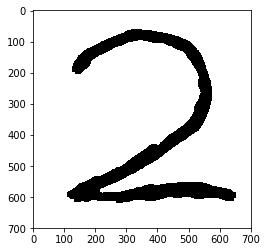

In [17]:
img_pred = cv2.imread ('num2.png', 0)
plt.imshow(img_pred, cmap='gray')

In [18]:
if img_pred.shape != [ 28 , 28 ]:
    img2 = cv2.resize ( img_pred, ( 28 , 28 ) )
    img_pred = img2.reshape ( 28 , 28 , - 1 ) ;
else :
    img_pred = img_pred.reshape ( 28 , 28 , - 1 ) ;
    
# here also we inform the value for the depth = 1, number of rows and columns, which correspond 28x28 of the image.
img_pred = img_pred.reshape( 1 , 1 , 28 , 28 )
pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba ( img_pred )
pred_proba = "%.2f %%" % (pred_proba[0][pred] * 100) 
print (pred[0] , "with probability of" , pred_proba )


(2, 'with probability of', '100.00 %')
